In [1]:
ls

 baseline.ipynb
 cmdist.npy
 HierarchicalClusteringComplete.ipynb
 memmap.ipynb
 metadata.csv
 pogo.ipynb
 README.md
 rice10frames.gif
 rice135frames.gif
 rice180frames.gif
 rice20frames.gif
 rice270frames.gif
 rice35frames.gif
 Rice3k.ipynb
 rice40frames.gif
 rice90frames.gif
'UMAP 3D Embedding Colored by 12 Hierarchical Clusters.png'
'UMAP 3D Embedding Labeled by Subpopulation.png'
'Unlabeled UMAP 3D Embedding.png'
 Untitled1.ipynb
 Untitled.ipynb
 visualizing-4-dimensional-data.ipynb
 visualizing-rice-population-genetics.ipynb


In [2]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
#from sklearn.cluster import DBSCAN,SpectralClustering
#from sklearn.decomposition import KernelPCA
from sklearn import metrics

#from scipy.cluster.hierarchy import fcluster
#from scipy.cluster.hierarchy import linkage
#from scipy.cluster.hierarchy import dendrogram


#from gtda.mapper import (
#    CubicalCover,
#    make_mapper_pipeline,
#    Projection,
#    Eccentricity,
#    plot_static_mapper_graph,
#    plot_interactive_mapper_graph,
#    FirstSimpleGap,
#    FirstHistogramGap)

#from gtda.homology import VietorisRipsPersistence
#from gtda import diagrams


from umap import UMAP

#from pandas_plink import read_plink1_bin

#from sklearn.decomposition import PCA, KernelPCA

#deprecated imports

#import datashader as ds
import pandas as pd
#from colorcet import fire
#from datashader import transfer_functions as tf

#import seaborn as sns#; sns.set_theme()

from matplotlib.colors import ListedColormap


#from sklearn.manifold import MDS

In [74]:
#from gudhi.clustering.tomato import Tomato
from matplotlib import animation
%matplotlib inline

In [4]:
metadata = pd.read_csv('metadata.csv',index_col='sample')

In [46]:
metadata
print(pd.unique(list(metadata['SUBPOPULATION'])))

['temp' 'japx' 'indx' 'ind1A' 'ind2' 'trop' 'admix' 'ind3' 'ind1B' 'aus'
 'subtrop' 'aro']


In [6]:
cmdist = np.load('cmdist.npy') #condensed mdist

In [7]:
print(cmdist.shape)
print(np.amax(cmdist))

(4570776,)
0.9920769162289682


In [8]:
mdist =  scipy.spatial.distance.squareform(cmdist, force='no', checks=True)

In [15]:
#Create a 4-d umap dimensionality reduction embedding to visualize all unsupervised models
umap_model_4d = UMAP(n_components=4,metric='precomputed',min_dist=0.16)
umap_embed_4d = umap_model_4d.fit_transform(mdist)

/home/a/anaconda3/envs/env-tda/lib/python3.9/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


In [60]:
#Create a 3-d umap dimensionality reduction embedding to visualize all unsupervised models
umap_model_3d = UMAP(n_components=3,metric='precomputed',min_dist=0.16)
umap_embed_3d = umap_model_3d.fit_transform(mdist)

/home/a/anaconda3/envs/env-tda/lib/python3.9/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


In [ ]:
embed_list = []
iter = 25
for i in range(iter):
    
    umap_model_3d = UMAP(n_components=3,metric='precomputed',min_dist=iter/100)
    umap_embed_3d = umap_model_3d.fit_transform(mdist)
    embed_list.append(umap_embed_3d)

/home/a/anaconda3/envs/env-tda/lib/python3.9/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(
/home/a/anaconda3/envs/env-tda/lib/python3.9/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(
/home/a/anaconda3/envs/env-tda/lib/python3.9/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(
/home/a/anaconda3/envs/env-tda/lib/python3.9/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(
/home/a/anaconda3/envs/env-tda/lib/python3.9/site-packages/umap/umap_.py:1735: UserWarning: using precom

In [65]:
embed_list[0]

array([[-5.4531784,  4.679617 ,  8.171832 ],
       [-5.328311 ,  4.4433255,  8.004784 ],
       [-4.7096877,  6.428304 ,  5.431307 ],
       ...,
       [11.371906 , 11.842427 ,  2.418965 ],
       [ 2.834363 ,  9.141927 ,  8.7145405],
       [-4.381397 ,  1.5185795,  4.8660774]], dtype=float32)

Text(0.5, 0.92, 'UMAP 3D Embedding Labeled by Subpopulation')

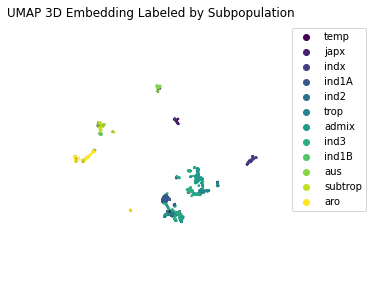

In [71]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embed_list[0][:,0],embed_list[0][:,1],embed_list[0][:,2],s=2,c=metadata.loc[:,'12'])
ax.legend(handles=scatter.legend_elements()[0],bbox_to_anchor=(1,1), labels=list(pd.unique(list(metadata['SUBPOPULATION']))))
ax.set_axis_off()


plt.title('UMAP 3D Embedding Labeled by Subpopulation')
#plt.savefig('UMAP 3D Embedding Labeled by Subpopulation',dpi=600)

interval is 200.0


<function matplotlib.pyplot.show(close=None, block=None)>

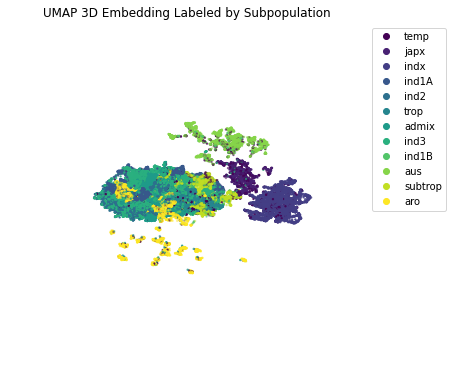

In [93]:
num_frames = iter
length_in_milliseconds = 5000
interval = length_in_milliseconds/num_frames
print('interval is', interval)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.set_axis_off()
plt.margins(0,0,0)
plt.tight_layout(pad=0)

scatter = ax.scatter(embed_list[0][:,0],embed_list[0][:,1],embed_list[0][:,2],s=2,c=metadata.loc[:,'12'])

legend = ax.legend(handles=scatter.legend_elements()[0],bbox_to_anchor=(1,1), labels=list(pd.unique(list(metadata['SUBPOPULATION']))))

plt.title('UMAP 3D Embedding Labeled by Subpopulation')
#plt.savefig('UMAP 3D Embedding Labeled by Subpopulation',dpi=600)
def init():
    ax.view_init(elev=0, azim=0)
    scatter = ax.scatter(embed_list[0][:,0],embed_list[0][:,1],embed_list[0][:,2],s=2,c=metadata.loc[:,'12'])

    legend = ax.legend(handles=scatter.legend_elements()[0],bbox_to_anchor=(1,1), labels=list(pd.unique(list(metadata['SUBPOPULATION']))))

    return scatter, legend

def animate(i):
    scatter = ax.scatter(embed_list[i][:,0],embed_list[i][:,1],embed_list[i][:,2],s=2,c=metadata.loc[:,'12'])
    legend = ax.legend(handles=scatter.legend_elements()[0],bbox_to_anchor=(1,1), labels=list(pd.unique(list(metadata['SUBPOPULATION']))))

    ax.view_init(elev=0, azim=i*360/num_frames)
    return scatter, legend

anim = animation.FuncAnimation(fig, animate, init_func=init, interval = interval, frames=num_frames, repeat=True, blit=False)

#writer = animation.FFMpegWriter(fps=50)

filename = 'umap_params' + str(num_frames) + 'frames.gif'
anim.save(filename,dpi=200)

plt.show

